# Exploring the Dunning-Kruger effect

Here we load the libraries we need:

In [29]:
import numpy as np
rng = np.random.default_rng()
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
pd.set_option('mode.copy_on_write', True)

In this notebook we are investigating whether the Dunning-Kruger effect can be explained with simple statistical artifacts.

An example of random choice.

In [30]:
a = rng.choice([1, 2], p=[0.3, 0.7], size=10)
a

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2])

Make some actual scores.

In [31]:
# Actual scores from some test.  Mean 50, std 15.
actual_scores = rng.normal(50, 15, size=10_000)
actual_scores[:10]

array([55.66556005, 52.53929137, 42.84960121, 54.34556647, 80.21182859,
       52.59004437, 68.08793673, 56.01820476, 52.8429168 , 40.04947041])

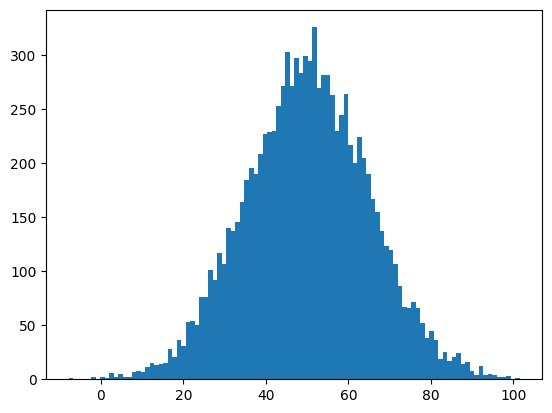

In [32]:
plt.hist(actual_scores, bins=100);

In [33]:
# Actually, I'm more interested in percentiles.  Let's order the scores.
sorted_actual = np.sort(actual_scores)
sorted_actual

array([ -7.81590451,  -1.54578506,  -1.3564272 , ...,  99.03269617,
        99.28898988, 101.49724233])

In [34]:
# Oh wait, it doesn't actually matter what the scores are, it just depends
# on their rank order.   I can just use linspace for that.
percentile_actual = np.linspace(0, 100, 10_000)
percentile_actual

array([  0.      ,   0.010001,   0.020002, ...,  99.979998,  99.989999,
       100.      ])

In [35]:
# Scale the range either side of the mean, to +-30 (rather than 50)
x = percentile_actual -  50. # Scale so range is -30 to +30.
crushed_bta = x * (30 / 50) + 60. # BTA effect (60 not 50).
np.mean(crushed_bta) 

60.0

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100.]),
 array([30. , 30.6, 31.2, 31.8, 32.4, 33. , 33.6, 34.2, 34.8, 35.4, 36. ,
        36.6, 37.2, 37.8, 38.4, 39. , 39.6, 40.2, 40.8, 41.4, 42. , 42.6,
        43.2, 43.8, 44.4, 45. , 45.6, 46.2, 46.8, 47.4, 48. , 48.6, 49.2,
        49.8, 50.4, 51. , 51.6, 52.2, 52.8, 53.4, 54. , 54.6, 55.2, 55.8,
        56.4, 57. , 57

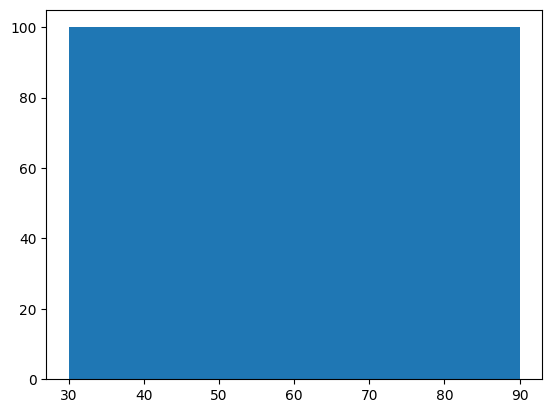

In [36]:
plt.hist(crushed_bta, bins=100)
#change

In [37]:
perceived_minus_actual = crushed_bta - percentile_actual
perceived_minus_actual

array([ 30.       ,  29.9959996,  29.9919992, ...,  -9.9919992,
        -9.9959996, -10.       ])

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([-10.,  -6.,  -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.]),
 <BarContainer object of 10 artists>)

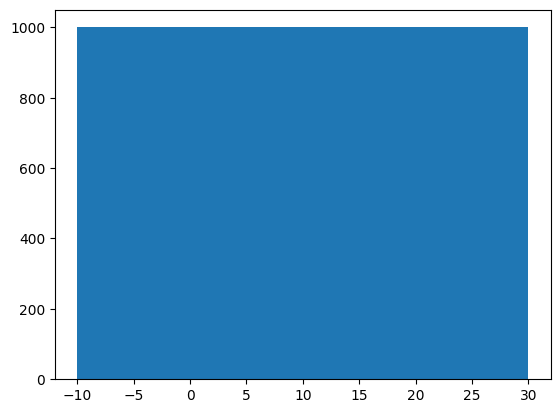

In [38]:
plt.hist(perceived_minus_actual)

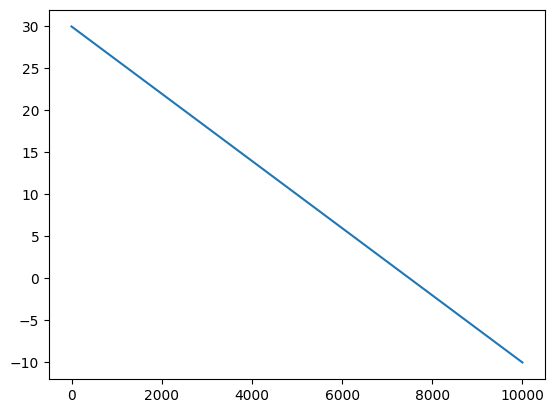

In [39]:
plt.plot(perceived_minus_actual)

In [40]:
df = pd.DataFrame({
    'actual_percentile': percentile_actual,
    'perceived_percentile': crushed_bta,
    'difference': crushed_bta - percentile_actual
})
df

,actual_percentile,perceived_percentile,difference
0,0.000000,30.000000,30.000000
1,0.010001,30.006001,29.996000
2,0.020002,30.012001,29.991999
3,0.030003,30.018002,29.987999
4,0.040004,30.024002,29.983998
...,...,...,...
9995,99.959996,89.975998,-9.983998
9996,99.969997,89.981998,-9.987999
9997,99.979998,89.987999,-9.991999
9998,99.989999,89.993999,-9.996000


In [41]:
df['actual_quantile'] = pd.qcut(df['actual_percentile'], 4,
                                labels=['low', 'med-low', 'med-high', 'high'])
df

,actual_percentile,perceived_percentile,difference,actual_quantile
0,0.000000,30.000000,30.000000,low
1,0.010001,30.006001,29.996000,low
2,0.020002,30.012001,29.991999,low
3,0.030003,30.018002,29.987999,low
4,0.040004,30.024002,29.983998,low
...,...,...,...,...
9995,99.959996,89.975998,-9.983998,high
9996,99.969997,89.981998,-9.987999,high
9997,99.979998,89.987999,-9.991999,high
9998,99.989999,89.993999,-9.996000,high


In [42]:
df.groupby('actual_quantile', observed=True)['difference'].mean()

actual_quantile
low         25.0015
med-low     15.0005
med-high     4.9995
high        -5.0015
Name: difference, dtype: float64

In [52]:
y = percentile_actual -  50. # Scale so range is -30 to +30.
crushed_bta_y = y * (30 / 50) + 70. # BTA effect, 70.
np.mean(crushed_bta)

60.0

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100.]),
 array([ 40. ,  40.6,  41.2,  41.8,  42.4,  43. ,  43.6,  44.2,  44.8,
         45.4,  46. ,  46.6,  47.2,  47.8,  48.4,  49. ,  49.6,  50.2,
         50.8,  51.4,  52. ,  52.6,  53.2,  53.8,  54.4,  55. ,  55.6,
         56.2,  56.8,  57.4,  58. ,  58.6,  59.2,  59.8,  60.4,  61. ,
         61.6,  62.2,  62.8,  63.4

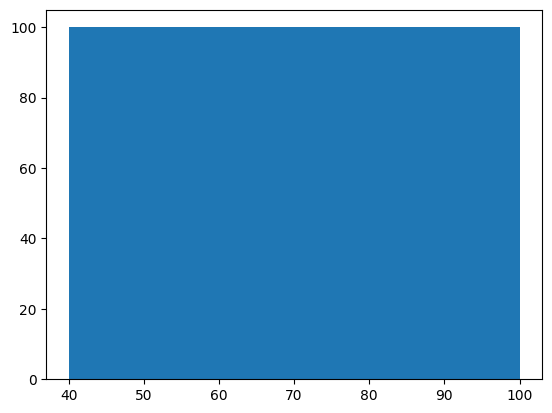

In [53]:
plt.hist(crushed_bta_y, bins=100)
#change

In [54]:
perceived_minus_actual_y = crushed_bta_y - percentile_actual
perceived_minus_actual_y

array([40.       , 39.9959996, 39.9919992, ...,  0.0080008,  0.0040004,
        0.       ])

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([-10.,  -6.,  -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.]),
 <BarContainer object of 10 artists>)

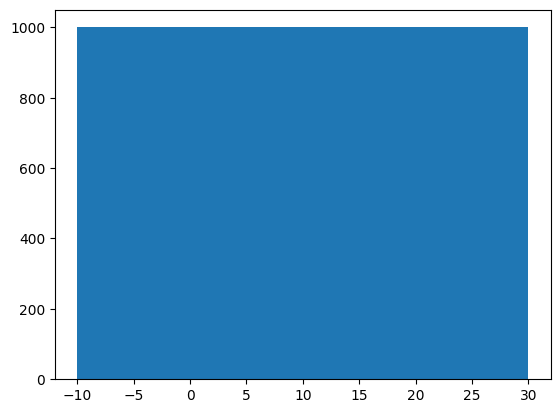

In [55]:
plt.hist(perceived_minus_actual)

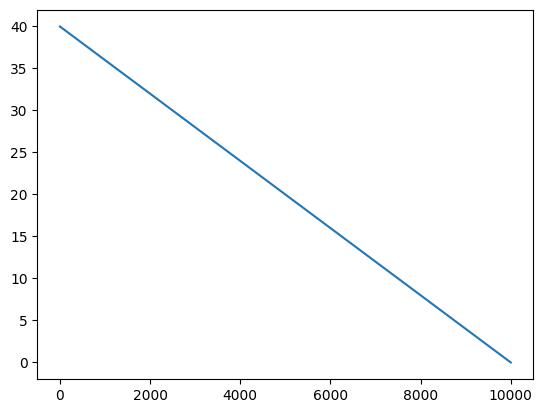

In [56]:
plt.plot(perceived_minus_actual_y)

In [57]:
df_y = pd.DataFrame({
    'actual_percentile': percentile_actual,
    'perceived_percentile': crushed_bta_y,
    'difference': crushed_bta_y - percentile_actual
})
df_y

,actual_percentile,perceived_percentile,difference
0,0.000000,40.000000,40.000000
1,0.010001,40.006001,39.996000
2,0.020002,40.012001,39.991999
3,0.030003,40.018002,39.987999
4,0.040004,40.024002,39.983998
...,...,...,...
9995,99.959996,99.975998,0.016002
9996,99.969997,99.981998,0.012001
9997,99.979998,99.987999,0.008001
9998,99.989999,99.993999,0.004000


In [58]:
df_y['actual_quantile'] = pd.qcut(df_y['actual_percentile'], 4,
                                labels=['low', 'med-low', 'med-high', 'high'])
df_y

,actual_percentile,perceived_percentile,difference,actual_quantile
0,0.000000,40.000000,40.000000,low
1,0.010001,40.006001,39.996000,low
2,0.020002,40.012001,39.991999,low
3,0.030003,40.018002,39.987999,low
4,0.040004,40.024002,39.983998,low
...,...,...,...,...
9995,99.959996,99.975998,0.016002,high
9996,99.969997,99.981998,0.012001,high
9997,99.979998,99.987999,0.008001,high
9998,99.989999,99.993999,0.004000,high


In [59]:
df_y.groupby('actual_quantile', observed=True)['difference'].mean()

actual_quantile
low         35.0015
med-low     25.0005
med-high    14.9995
high         4.9985
Name: difference, dtype: float64

In [60]:
df.groupby('actual_quantile', observed=True)['difference'].mean()

actual_quantile
low         25.0015
med-low     15.0005
med-high     4.9995
high        -5.0015
Name: difference, dtype: float64

Do you replicate the Dunning-Kruger effect? In your notebook text cells, justify your choices for the simulation — why are these realistic choices? How would you decide between your choices, and my crushed score model?

I think the Dunning-Kruger effect is semi-replicated here. The only thing I changed in the simulation was the crushing, so that the split of scores was still around 70. I don't completely understand the Dunning-Kruger effect as a statistical phenomena, so this is my way of understanding it.

I also feel like it is more likely that when people think they're better than average, they think they're a 7/10 over 6/10. This adjustment also allows for the people who genuinely have deep knowledge of a subject and are at the top end of the spectrum.

It seems that when the better than average effect is around 70%, there is some demonstration of the Dunning-Kruger effect, as the difference between the perceived and actual scores diminshes as people's knowledge increases. I think the only aspect that doesn't match up is that those at the top don't perceive their aptitude as less than it is, just more realistically.